In [20]:
%matplotlib inline
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


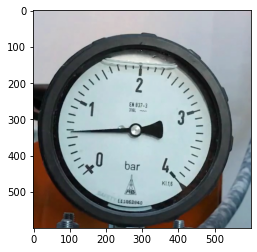

In [21]:
# D:\StudyTime\ProgrammingWorld\CodeZone\Development\AI_ML\Python\PressureGaugeReader\Images\out2\ExtractedImages
imgname = "../Python/PressureGaugeReader/Images/out2/ExtractedImages/ou0001.jpg"
# https://i.stack.imgur.com/5oOGL.jpg
# imgname = "stkdata/5oOGL.jpg"
image = cv2.imread(imgname)
plt.imshow(image)

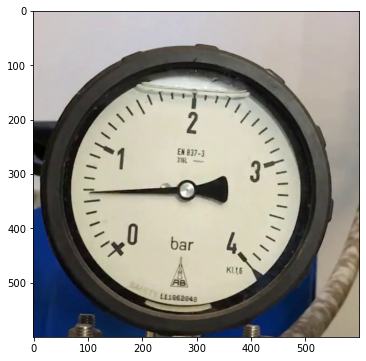

In [22]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [23]:
img_hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)  # Convert to HSV space

In [24]:


# # Lower hues mask (0-10)
# lower_red, upper_red = np.array([0,50,20]), np.array([10,255,255])
# mask0 = cv2.inRange(img_hsv, lower_red, upper_red)
# fig, ax = plt.subplots(figsize=(7, 7))
# ax.set_title("Thresholded Mask0", fontsize=16)
# ax.imshow(mask0, cmap="Greys")

# # Upper hues mask (170-180)
# lower_red, upper_red = np.array([170,50,0]), np.array([180,255,255])
# mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

# # Combine masks
# mask = mask0 + mask1
# fig, ax = plt.subplots(figsize=(7, 7))
# ax.set_title("Red Color Thresholded Mask", fontsize=16)
# ax.imshow(mask, cmap="Greys")

In [25]:
# channel_means = cv2.mean(img_hsv, mask=~mask)  # Invert mask to sample only the rectangle
# print(channel_means)
# print("Mean value (brightness) in red rectangle is %.2f" % (channel_means[2],))

In [26]:
# # RETR_EXTERNAL is the contour retrieval mode, CHAIN_APPROX_NONE is the contour approximation method
# # Output is a Python list of all the found contours, each one is a Numpy array of (x,y) coordinates
# (_,contours,_) = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [27]:
# # For each contour check object area with a bounding box, if area above threshold assume we found the rectangle
# imcopy = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).copy()
# for contour in contours:
#     (x,y,w,h) = cv2.boundingRect(contour)
    
#     # A threshold area of 1000 works for all the images in the data set (which can have different resolutions)
#     if w*h > 1000:
#         rect = cv2.minAreaRect(contour)  # Fit a rotated rectangle bounding box to the contour
#         print("Rotated rectangle found at center point" , np.round(rect[0]), "with angle", np.round(rect[2], 2), "degrees.")
#         print("Rotated rectangle width is %i and area is %i" % (np.round(min(rect[1][0], rect[1][1])), np.round(rect[1][0]*rect[1][1])))
#         rotrect_angle, rect_width, rect_area = rect[2], min(rect[1][0], rect[1][1]), rect[1][0]*rect[1][1]
#         print(rect[0])
#         # Draw the rotated rectangle (see https://stackoverflow.com/questions/11779100/python-opencv-box2d)
#         box = cv2.boxPoints(rect) # cv2.boxPoints(rect) for OpenCV 3.x
#         box = np.int0(box)
#         cv2.drawContours(imcopy,[box], 0, (0,255,0), 1)

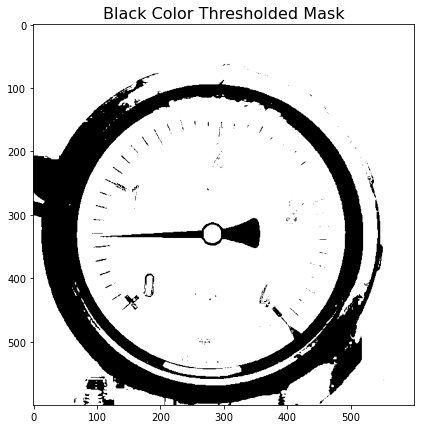

In [28]:
# Black HSV mask
lower_black, upper_black = np.array([0, 0, 0]), np.array([180, 255, 65])
mask = cv2.inRange(img_hsv, lower_black, upper_black)
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title("Black Color Thresholded Mask", fontsize=16)
ax.imshow(mask, cmap="Greys")

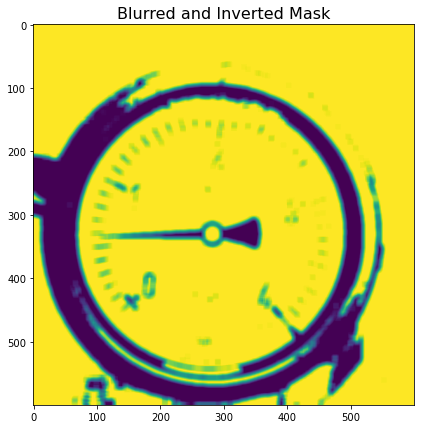

In [29]:
# Apply a Gaussian Blur to the inverted mask
blurred = cv2.blur(~mask, (9, 9))
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title("Blurred and Inverted Mask", fontsize=16)
ax.imshow(blurred)

In [31]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
 
# Adjust parameters for determining blob stability/repeatability
params.minThreshold = 0;
params.maxThreshold = 100;
params.minRepeatability = 1
 
# Filter by Area.
params.filterByArea = True
params.minArea = 0 # 0.75 * 118 * rect_area / 8079  # rect_area is found above during red rectangle detection
 
# Filter by Circularity
# params.filterByCircularity = True
# params.minCircularity = 0.5
 
# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

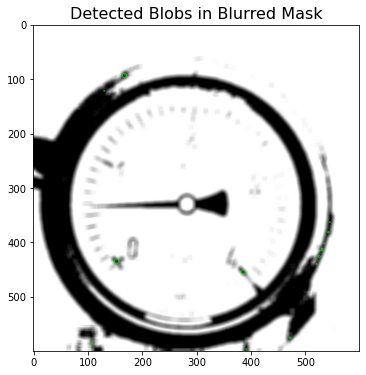

In [32]:
# Detect blobs
keypoints = detector.detect(blurred)

# Draw detected blobs as green circles on the blurred mask
imcopy = image.copy()
im_with_keypoints = cv2.drawKeypoints(blurred, keypoints, 
                                      np.array([]), (0,255,0), 
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)  # ensures circle size corresponds to blob size
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("Detected Blobs in Blurred Mask", fontsize=16)
ax.imshow(im_with_keypoints)

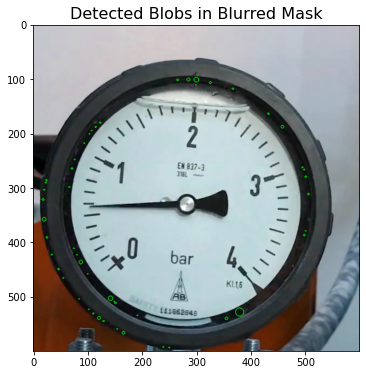

In [34]:
# image = cv2.imread(data_path + "sample1b.jpg")
# img_hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)  # Convert to HSV space

# Increment upper bound for "value" (brightness) until we find 6 blobs
n_blobs = 0
v_upper = 25
while n_blobs < 6 and v_upper < 100:
    
    # Black HSV mask
    lower_black, upper_black = np.array([0, 0, 0]), np.array([180, 255, v_upper])
    mask = cv2.inRange(img_hsv, lower_black, upper_black)
    
    # Apply a Gaussian Blur to the inverted mask
    blurred = cv2.blur(~mask, (9, 9))

    # Detect blobs
    keypoints = detector.detect(blurred)
    n_blobs = len(keypoints)
    v_upper += 5

# Draw detected blobs as green circles on the original image
imcopy = image.copy()
im_with_keypoints = cv2.drawKeypoints(imcopy, keypoints, 
                                      np.array([]), (0,255,0), 
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)  # ensures circle size corresponds to blob size
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("Detected Blobs in Blurred Mask", fontsize=16)
ax.imshow(im_with_keypoints)

In [35]:
# Extract coordinates of gauge centers in the (column index, row index) convention
gauge_center_coords = []
for kp in keypoints:
    gauge_center_coords.append((np.int(kp.pt[0]), np.int(kp.pt[1])))
    
# Sort the gauge's by center coordinates
gauge_center_coords.sort(key=lambda x: x[1])
gauge_center_coords[0:4] = sorted(gauge_center_coords[0:4], key=lambda x: x[0])
gauge_center_coords[4:] = sorted(gauge_center_coords[4:], key=lambda x: x[0])
print("Gauge centers found at coordinates: ", gauge_center_coords)

Gauge centers found at coordinates:  [(264, 101), (284, 101), (299, 101), (324, 106), (17, 321), (19, 357), (20, 303), (23, 290), (24, 286), (25, 391), (34, 422), (46, 448), (47, 450), (54, 465), (66, 298), (71, 264), (74, 411), (76, 248), (80, 423), (84, 504), (87, 436), (93, 218), (100, 458), (102, 523), (103, 201), (107, 195), (110, 530), (114, 188), (115, 188), (120, 538), (122, 180), (129, 544), (141, 502), (149, 509), (151, 511), (154, 559), (165, 566), (191, 534), (238, 592), (249, 593), (354, 539), (366, 118), (378, 528), (431, 163), (432, 165), (457, 187), (494, 262), (497, 266), (497, 386), (500, 279), (500, 379), (505, 311)]


C:\Users\Kunnu\AppData\Local\Temp/ipykernel_24988/2789644963.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  gauge_center_coords.append((np.int(kp.pt[0]), np.int(kp.pt[1])))


Locating Gauge Needles

In [36]:
# Pick out the first gauge to work on
circ_col, circ_row = gauge_center_coords[0]

# Extract rotated rectangle parameters
rotrect_angle, rect_width, rect_area = rect[2], min(rect[1][0], rect[1][1]), rect[1][0]*rect[1][1]
rect_col, rect_row = rect[0] 

# Determine good size for circles to be drawn around gauges
circ_rad = np.int(30 * rect_width / 57)

# Draw a circle centered around gauge center point, extract pixel indices and colors on circle perimeter
blank = np.zeros(image.shape[:2], dtype=np.uint8)
cv2.circle(blank, (circ_col, circ_row), circ_rad, 255, thickness=1)  # Draw function wants center point in (col, row) order like coordinates
ind_row, ind_col = np.nonzero(blank)
b = image[:, :, 0][ind_row, ind_col]
g = image[:, :, 1][ind_row, ind_col]
r = image[:, :, 2][ind_row, ind_col]
colors = list(zip(b, g, r))

# "reverse" the row indices to get a right-handed frame of reference with origin in bottom left of image
ind_row_rev = [image.shape[0] - row for row in ind_row]
circ_row_rev = image.shape[0] - circ_row
rect_row_rev = image.shape[0] - rect_row

# Convert from indexes in (row, col) order to coordinates in (col, row) order
circ_x, circ_y = circ_col, circ_row_rev
original_coord = list(zip(ind_col, ind_row_rev))
rect_x, rect_y = rect_col, rect_row_rev

# Rotate coords about rectangle center in order to identify topmost pixel of gauges
temp_x, temp_y = [x - rect_x for x in ind_col], [y - rect_y for y in ind_row_rev]  # Translate from rectangle center point
angle_deg = get_real_angle(rotrect_angle)
theta = angle_deg * (np.pi/180)
rotated = []
for (x, y) in list(zip(temp_x, temp_y)):
    rotated.append(((x*np.cos(theta) - y*np.sin(theta)) + rect_x, 
                    (y*np.cos(theta) + x*np.sin(theta)) + rect_y))  # Rotate about 0,0 then reverse translation from rectangle center point
top_yval = max([y for (x,y) in rotated])
top_pixel = [(x, y) for (x, y) in rotated if y == top_yval][0]

# Translate coords from gauge centers in order to compute angle between points on the perimeter
translated = []
for (x, y) in original_coord:
    translated.append((x - circ_x, y - circ_y))

# Construct dataframe holding various coordinate representations and pixel values
df = pd.DataFrame({"indices":list(zip(ind_col, ind_row)), "orig":original_coord, "rot": rotated, "trans": translated, "color": colors})

# Identify the pixel which is the topmost point of the circle when properly rotated
df["top_pixel"] = (df["rot"] == top_pixel)
top_trans_pix = df.loc[df["top_pixel"], "trans"].values[0]
df.head()

# Visualize the circle and topmost circle pixel
imcopy = image.copy()
fig, ax = plt.subplots(figsize=(18, 6))
ax.set_title("Sample Perimeter Circle and Topmost Pixel", fontsize=16)
cv2.circle(imcopy, (circ_col, circ_row), circ_rad, 255, thickness=1)  # Draw circle around gauge center point
top_orig_pix =  df.loc[df["top_pixel"], "indices"].values[0]  # Get indices for "topmost" pixel on circle after rotation
cv2.circle(imcopy, top_orig_pix, 1, 255, thickness=3)  # Draw topmost pixel
ax.imshow(imcopy)

NameError: name 'rect' is not defined